In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import fmin_ncg,minimize

In [2]:
# load the data from the file
data = pd.read_csv('data.txt',header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
# x = feature values, all the columns except the last column
x = data.iloc[:, :-1]
# y = target values, last column of the data frame
y = data.iloc[:, -1]

In [4]:
# filter out the applicants that got admitted
admitted = data.loc[y==1]
# filter out the applicants that din't get admission
not_admitted = data.loc[y==0]

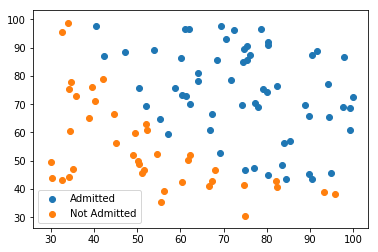

In [5]:
plt.scatter(admitted.loc[:, 0], admitted.loc[:, 1],label='Admitted')
plt.scatter(not_admitted.loc[:, 0], not_admitted.loc[:, 1],label='Not Admitted')
plt.legend()
plt.show()


In [6]:
# data for our model
X = np.c_[np.ones((data.shape[0],1)),data.loc[:,:1]]
Y = np.c_[data.loc[:,2]]
theta = np.zeros((data.shape[1],1))

In [7]:
# Activation function used to map any real value between 0 and 1
def sigmoid(z):
    return 1/(1+np.exp(-z) )

In [8]:
# Computes the cost function for all the training samples
def cost_function(theta,x,y):
    m = y.size
    h = sigmoid(x.dot(theta))
    j = -(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot((1-y)))
    return j

In [9]:
# Computes the gradient of the cost function at the point theta
def gradient(theta,x,y):
    m = y.size
    h = sigmoid(x.dot(theta))
    grad = (1/m)*X.T.dot(h-y)
    return grad.flatten()

In [10]:
cost = cost_function(theta,X,Y)
grad = gradient(theta,X,Y)
print('Cost:', cost)
print('Gradient:', grad)

Cost: [[0.69314718]]
Gradient: [ -0.1        -12.00921659 -11.26284221]


In [11]:
def fit(theta,x,y):
    optimized = fmin_ncg(f=cost_function, x0=theta, fprime=gradient,args=(x, y.flatten()))
    return optimized

In [12]:
parameter = fit(theta,X,Y)

Optimization terminated successfully.
         Current function value: 0.203980
         Iterations: 25
         Function evaluations: 63
         Gradient evaluations: 205
         Hessian evaluations: 0


In [13]:
def predict(theta,x):
    p = sigmoid(x.dot(theta.T))>=0.5
    return p.astype('int')

In [14]:
# Student with Exam 1 score 45 and Exam 2 score 85
# Predict using the optimized Theta values from above (parameter).
sigmoid(np.array([1, 45, 85]).dot(parameter.T))

0.7615268614830188

In [15]:
predict(parameter,np.array([1, 45, 85]))

1

In [16]:
p = predict(parameter,X)
print('Train accuracy : {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy : 89.0%


In [17]:
x_values = [np.min(X[:, 1]), np.max(X[:, 2] )]
y_values = - (parameter[0] + np.dot(parameter[1], x_values)) / parameter[2]

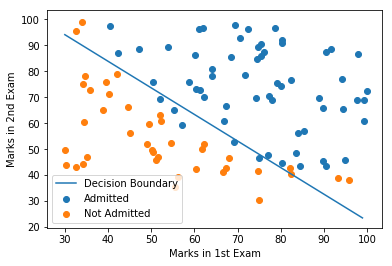

In [21]:
plt.scatter(admitted.loc[:, 0], admitted.loc[:, 1],label='Admitted')
plt.scatter(not_admitted.loc[:, 0], not_admitted.loc[:, 1],label='Not Admitted')
plt.plot(x_values, y_values, label='Decision Boundary')
plt.xlabel('Marks in 1st Exam')
plt.ylabel('Marks in 2nd Exam')
plt.legend()
plt.show()
